<a href="https://colab.research.google.com/github/Xalphanos/Pytorch_Basics/blob/main/03dataclassificationwithpytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make data classification and get it ready

In [186]:
import sklearn

In [187]:
from sklearn.datasets import make_circles


# make 1000 samples
n_samples= 1000

# create circles with some random noise
x,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [188]:
len(x), len(y)

(1000, 1000)

In [189]:
print(f"first 5 samples of x{x[:5]}")
print(f"first 5 samples of y{y[:5]}")# 2 featues of x with one result of y
y

first 5 samples of x[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y[1 1 1 1 0]


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [190]:
# make a dataframe of circle data
import pandas as pd
circles=pd.DataFrame({"X1": x[:,0],
                      "X2": x[:,1],
                      "label":y

})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


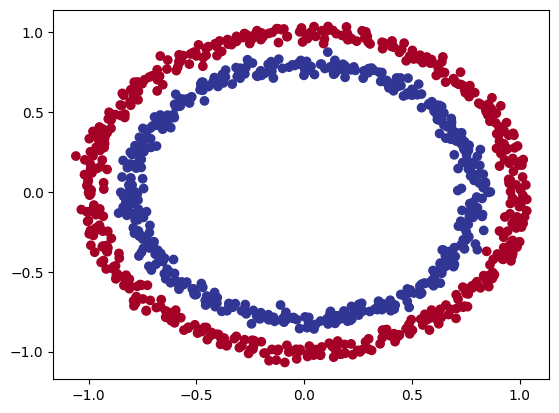

In [191]:
# viasualize and do it again
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0],
            y=x[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);


# data we are working on is called is called toy dataset: data which is small enough to experiement but sizeable enough for learking ai and ml learning


# 1.1 Check input and output datasets, (as dataset mismatch is one of the most common errors)

In [192]:
x.shape,y.shape

((1000, 2), (1000,))

In [193]:
# view the first example of featues and labels
x_sample=x[0]
y_sample=y[0]
print(f"Value for one sample of x: {x_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of x:{x_sample.shape} and similarly for y {y_sample.shape}")

Value for one sample of x: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of x:(2,) and similarly for y ()


# turning data into tensors and create train and test splits

In [194]:
import torch

torch.__version__

'2.8.0+cu126'

In [195]:
# turn data into tensors
X=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [196]:
X.dtype,y.dtype, type(X)

(torch.float32, torch.float32, torch.Tensor)

In [197]:
# splitting data into training and tests sets

from sklearn.model_selection import train_test_split # this is what randomly

X_train,X_test, y_train,y_test= train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)
# 20 percent of the data will be test and rest 80 percent will bhe train )
len(X_train),len(X_test),len(y_train), len(  y_test)

(800, 200, 800, 200)

## Now we are attempting to build the model
steps are:
1. setup device agonstic code
2. contruct a model by subcalssing nn.module
3. define loss function and optimiser
4. create a training and test loop



In [198]:
 # import Pytorch and nn
 import torch
 from torch import nn

 # make device agostic code
 device = 'cuda' if torch.cuda.is_available() else "cpu"



In [199]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

# Creating the model
1. Subclasses nn.moudle (almost all models in pytorch subclasses nn.module
2. create 2 nn.Linear() ' layers that are capable of handling the shapes of our data
3. Defines a forward method that outlines the forward pass(for forward computation)
4. Instantiate an instance of our model class and send it to the target device


In [200]:
# construct a model that subclasses nn.Module

class CircleModelPrototype(nn.Module):
  def __init__(self):
    super().__init__()
    #2. create the linear layers instead of the properites we did at the prototyp(e
    # self.layer_1=nn.Linear(in_features=2,out_features=5)# takes in 2 featues and outputs 5 to the second layer
    # self.layer_2=nn.Linear(in_features=5,out_features=1)# takes in 5 featues and outputs a single feature

    self.two_linear_layers= nn.Sequential(
        nn.Linear(in_features=2,out_features=5),
        nn.Linear(in_features=5,out_features=1)
    )
  def forward(self,x):
    #return self.layer_2(self.layer(_1(x)) # x -> layer_1 -> layer 2 -> output
    return self.two_linear_layers(x)
# instantiate a instance of the model class

model_0= CircleModelPrototype().to(device)
model_0



CircleModelPrototype(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

Subclassing is bette rwith larger models


In [201]:
 next(model_0.parameters()).device

device(type='cpu')

In [202]:
# replicating the mdoel with nn.sequential
model_1=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

In [203]:
model_0.state_dict()

OrderedDict([('two_linear_layers.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('two_linear_layers.0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('two_linear_layers.1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('two_linear_layers.1.bias', tensor([-0.2060]))])

In [204]:
# make predictions
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
print(f"length of the predictions : {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"length of the test samples: {len(X_test)}, shape of the same {X_test.shape}")

print(f"\n first 10 predictions :\n{untrained_preds[:10]}")
print(f"\n first ten labels\n {y_test[:10]}")

length of the predictions : 200, shape: torch.Size([200, 1])
length of the test samples: 200, shape of the same torch.Size([200, 2])

 first 10 predictions :
tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]])

 first ten labels
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [205]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### setup loss fucntion and optimiser
which loss function should we use?

Problem specific loss function and optimiser

for regression you might want to use Mean Absolute Error (MAE) or Mean squared error(MSE)

for classification you want binary cross entropy or categorical cross entropy(cross entropy)

reminder the loss function measures how wrong your predictions are
And for optimisers , two of the common and useful are SGD and Adam, however there are many options to choose from

* For the loss fucntion we are going to use 'torch.nn.BECWithLogitsLoss(), check out binary cross entropy

* search for logit in deep learning

* for different optimisers use torch.optim




In [206]:
# we are setting up the loss funcition

#loss_fn=nn.BCELoss() one problem is that it requires the input to go through the sigmoid function

''' nn.Sequential(
    nn.Sigmoid(),
    nn.BCELoss() something like this is equivalent to the downpart
) '''
loss_fn=nn.BCEWithLogitsLoss()# this combined from is used for numerical stability

optimiser=torch.optim.SGD(params=model_0.parameters(),
                          lr=.001)

In [207]:
# we now have to calcualte the accracy of the model like out of 100 tries how much does it get right>?

def accuracy_fn(y_true, y_pred):
  correct= torch.eq(y_true, y_pred).sum().item()
  acc=(correct/len(y_pred))*100 # this will give a percentage of the accuracy that out model performs
  return acc


#Now we should train the model

to train the model we should the training loop

* first we dpo the forward pass

* we calculate the loss

* optimiser zero grad for resetting the gradients

* backpropagation for knowing the gradients of the loss like how much does each variable has on the actual result of the program

* then optimiser step function to multiply the learning rate and then subtracting the gradients

In [208]:
# we will see what the model outputs when in absence of any activation fucntion

model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]# logits is defined here as anything that is the output without running it through an activation function
y_logits


tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]])

In [209]:
y_test[:5]# see the output of the model and the training data actually do not match thats why we need an activation function to solve that to keep them in the same dimension

tensor([1., 0., 1., 0., 1.])

In [210]:
#using the sigmoid function as the activation here
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]])

people might want to know we we are using the sigmoid activation function instead of just rounding it? it is to get a value between 0 and 1, like the sigmoid fucntion actually normalises the input vlaues to denote how much a value is closer to other to tell how close it is to the activation, like closer to 1 its pretty confident and closer to 0 its pretty confident that it is wrong so thats why we use the round function after it

In [211]:
#find the predicted labels
y_pred=torch.round(y_pred_probs)

#in full
y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check for equality
print(torch.eq(y_pred.squeeze(),y_pred_labels.squeeze()))

#get rid of the extra dimension
y_pred.squeeze()


tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

# creating the forward pass and training loop


In [215]:
torch.manual_seed(42)

epochs=10000

X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs):

  model_0.train()

  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))#turning logits -> pred probls -pred labels

  #calculate accuracy
  #loss = loss_fn(torch.sigmoid(y_logits)) ##nn.BCELoss expects prediction probabilities as input
  loss=loss_fn(y_logits,
                  y_train)#nn.BCEWithLogitsLoss expects raw logits as inputs
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  # optimiser zero grad
  optimiser.zero_grad()

  #backpropagation
  loss.backward()

  #optimiser ste[(gradient descent)]
  optimiser.step()

  model_0.eval()
  with torch.inference_mode():
    #forward pass
    test_logits=model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #calcualte the test loss / accuracy
    test_loss=loss_fn(test_logits,y_test)

    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred)
  if epoch %10 ==0:
    print(f"epoch {epoch}| loss:{loss:.5f},acc:{acc:.5f}% Test_loss:{test_loss:.5f}, test acc:{test_acc:.5f}")


epoch 0| loss:0.69569,acc:50.00000% Test_loss:0.69740, test acc:50.00000
epoch 10| loss:0.69566,acc:50.00000% Test_loss:0.69738, test acc:50.00000
epoch 20| loss:0.69563,acc:50.00000% Test_loss:0.69736, test acc:50.00000
epoch 30| loss:0.69561,acc:50.00000% Test_loss:0.69734, test acc:50.00000
epoch 40| loss:0.69558,acc:50.00000% Test_loss:0.69733, test acc:50.00000
epoch 50| loss:0.69556,acc:50.00000% Test_loss:0.69731, test acc:50.00000
epoch 60| loss:0.69553,acc:50.00000% Test_loss:0.69729, test acc:50.00000
epoch 70| loss:0.69551,acc:50.00000% Test_loss:0.69727, test acc:50.00000
epoch 80| loss:0.69549,acc:50.00000% Test_loss:0.69725, test acc:50.00000
epoch 90| loss:0.69546,acc:50.00000% Test_loss:0.69723, test acc:50.00000
epoch 100| loss:0.69544,acc:50.00000% Test_loss:0.69721, test acc:50.00000
epoch 110| loss:0.69542,acc:50.00000% Test_loss:0.69720, test acc:50.00000
epoch 120| loss:0.69539,acc:50.00000% Test_loss:0.69718, test acc:50.00000
epoch 130| loss:0.69537,acc:50.00000

In [213]:
loss_fn

BCEWithLogitsLoss()

In [214]:
loss_fn_without_logits=nn.BCELoss()
loss_fn_without_logits

BCELoss()